In [1]:
%reload_ext autoreload
%autoreload 2

In [68]:
import numpy as np
import PIL as pil
import matplotlib.pyplot as plt
import json
from math import ceil, log2
import plotly.express as px
from util import *

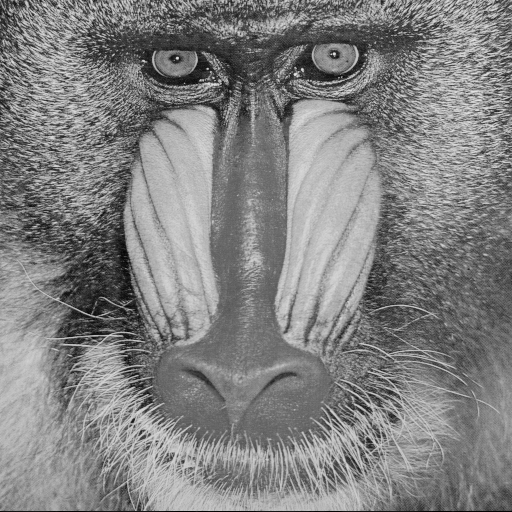

In [3]:
filename = 'images/baboon.bmp'
image = pil.Image.open(filename)
image

In [4]:
array = np.asarray(image)
array

array([[147,  56,  47, ..., 115, 159, 181],
       [119, 100,  38, ..., 133, 152, 130],
       [ 76, 116,  45, ...,  98,  89,  81],
       ...,
       [143, 149, 144, ...,  80,  91,  79],
       [160, 144, 133, ...,  81,  77,  67],
       [ 11,  12,  14, ...,   7,   4,   5]], dtype=uint8)

In [5]:
import ciqa

[[144  42  42 ... 109 156 203]
 [144  93  42 ... 156 156 109]
 [ 93  93  42 ... 109 109  62]
 ...
 [166 166 166 ...  61 103  61]
 [166 166 119 ...  61  61  61]
 [ 25  25  25 ...  20  20  20]]


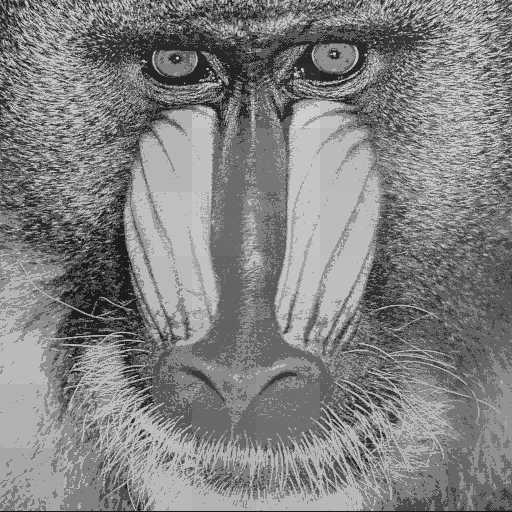

In [6]:
block_size = 512 // 8
levels = 4
data = ciqa.compress(image, block_size, levels)
decompressed = ciqa.decompress(data)
print(decompressed)
pil.Image.fromarray(decompressed)

In [7]:
def mse(a: np.ndarray, b: np.ndarray) -> float:
    return (np.square(a - b)).mean(axis=None)

In [10]:
def compare(image, block_size, levels) -> float:
    original = np.asarray(image)
    data = ciqa.compress(image, block_size, levels)
    decompressed = ciqa.decompress(data)
    return mse(original, decompressed)

In [11]:
block_sizes = np.array([4,8,16,32]) # N
levels = np.array([2,4,8,6])        # M

mse_data = np.array([(x,y,compare(image, x, y)) for x in block_sizes for y in levels])
mse_data

xs = np.array([t[0] for t in mse_data])
ys = np.array([t[1] for t in mse_data])
zs = np.array([t[2] for t in mse_data])

labels = {'x':'Block Size (N)', 'y':'Levels (M)', 'z': 'MSE'}
fig = px.scatter_3d(x=xs, y=ys, z=zs, labels=labels)
fig.show()

In [12]:
# civq
import civq
from scipy.cluster.vq import kmeans, kmeans2, whiten

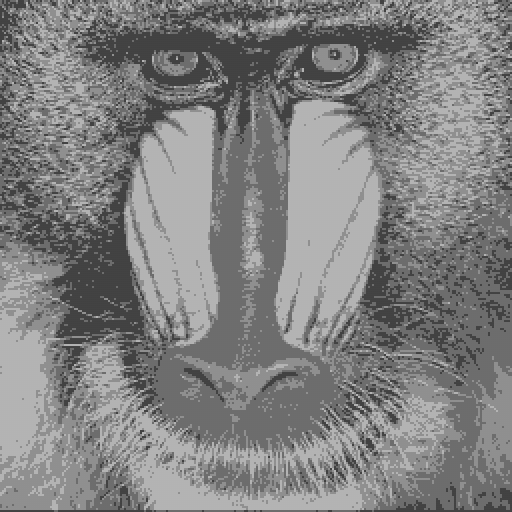

In [19]:
k = 4
block_size = 2
data = civq.compress(array, block_size, k)
decompressed = civq.decompress(data)
pil.Image.fromarray(decompressed)

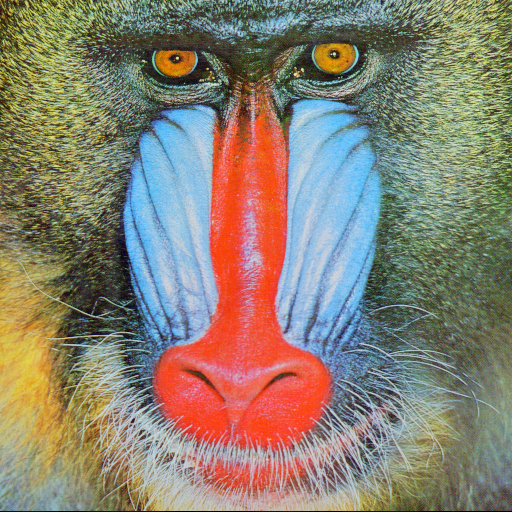

In [21]:
# cimap
filename = 'images/baboon_colour.bmp'
image = pil.Image.open(filename)
image

In [24]:
array = np.asarray(image)
array.shape

(512, 512, 3)

In [71]:
r = array[:,:,0].flatten()
g = array[:,:,1].flatten()
b = array[:,:,2].flatten()

In [77]:
flattened_vectors = np.array([np.array(list(x)) for x in zip(r,g,b)])
flattened_vectors

array([[164, 150,  71],
       [ 63,  57,  31],
       [ 75,  43,  10],
       ...,
       [  5,   8,   5],
       [  2,   5,   0],
       [  4,   5,   2]], dtype=uint8)

In [79]:
k = 4
codebook, labels = get_codebook(flattened_vectors, k)
codebook, labels

(array([[227,  92,  59],
        [150, 185, 206],
        [ 80,  83,  66],
        [146, 150, 117]], dtype=uint8),
 array([3, 2, 2, ..., 2, 2, 2], dtype=int32))